###**Machine Learning Project on an energy efficiency prediction problem** 

In [317]:
#Here I am installing the sklearn library, to make sure I have the latest version
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [318]:
#Here I am imported the python libraries that I will be using for this machine learning project.
#The Python libraries that I have imported are: pandas, matplotlib, sklearn and numpy.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
import seaborn as sns

# Load the dataset into a pandas DataFrame
data = pd.read_csv("datcw_na.csv")


In [319]:
#Renaming the columns to make it easier to understand the data
data = data.rename(columns={
    "X0":"Catergory of the building",
    "X1":"Relative Compactness",
    "X2":"Surface Area",
    "X3":"Wall Area",
    "X4":"Roof Area",
    "X5":"Overall Height",
    "X6":"Orientation",
    "X7":"Glazing Area",
    "X8":"Glazing Area Distribution",
    "Y":"Heating Load"
})

In [320]:
#DATA SPLITTING SHOULD BE DONE HERE!!!!

In [321]:
data.head()

,Catergory of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [322]:
x_data = data.drop("Heating Load", axis=1)

y_data = data["Heating Load"]

# to make this notebook's output identical at every run
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [323]:
df = pd.concat([X_train, Y_train], axis=1)

### 1. Introduction

For this project we are going to use a dataset that has 9 features and an output variable. The features are Category of the building, Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution and the output variable is Heating Load. 

### 2. Methodology

Here I am going to perform a data inspection, visualisation, data preprocessing, data transformation, treatment of missing value, feature selection.

The analysis will include a predicitive models based on the Linear regression models, Ridge regression models and Lasso Regression models. 

Ridge Regression and the Lasso Regression models will be tuned when they are being trained on the training set. 


After training the models using the training set, I am going to select the two best models and evaluate them using the test set. 

### 3. Data inspection and visualisation

Dimensions of dataset: (537, 10)
    Catergory of the building  Relative Compactness  Surface Area  Wall Area  \
334                        C3                  0.61        800.42     363.82   
139                        C3                  0.63        705.60     339.57   
485                        C2                  0.99        557.86     315.32   
547                        C1                  0.71        630.63     339.57   
18                         C2                  0.71        630.63     377.30   

     Roof Area  Overall Height  Orientation  Glazing Area  \
334     242.55            2.84         3.96          0.24   
139     198.45            3.85         6.05          0.10   
485     110.25            6.30         3.30          0.28   
547     119.07            7.70         6.05          0.36   
18      119.07            5.67         3.60          0.00   

     Glazing Area Distribution  Heating Load  
334                       0.99         15.08  
139                      

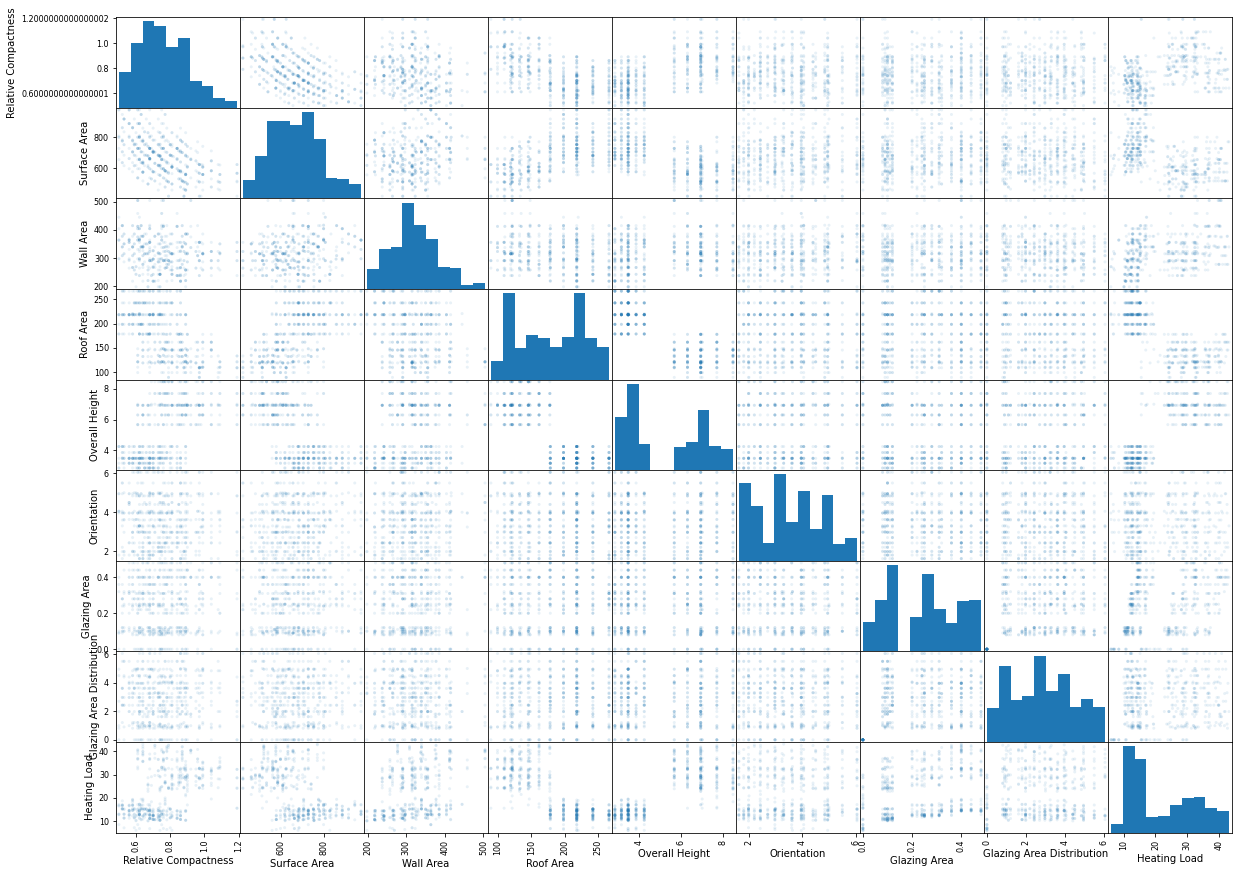

In [324]:
# Check the dimensions of the dataset
print("Dimensions of dataset:", df.shape)

# Look at the first few rows of the dataset
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Summarize the distribution of the features
print(df.describe())

# Visualize the distribution of the features
pd.plotting.scatter_matrix(df,alpha=0.1, figsize=(20,15))
plt.show()

<AxesSubplot:>

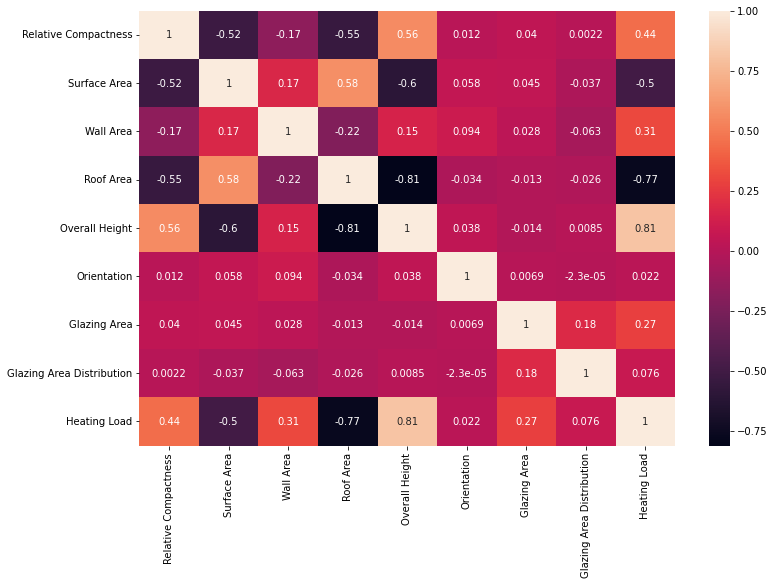

In [325]:
#HeatMap of the corrleation of the 9 features and the output variable. 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [326]:
# Printing out the information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Catergory of the building  537 non-null    object 
 1   Relative Compactness       537 non-null    float64
 2   Surface Area               537 non-null    float64
 3   Wall Area                  511 non-null    float64
 4   Roof Area                  537 non-null    float64
 5   Overall Height             537 non-null    float64
 6   Orientation                537 non-null    float64
 7   Glazing Area               537 non-null    float64
 8   Glazing Area Distribution  537 non-null    float64
 9   Heating Load               537 non-null    float64
dtypes: float64(9), object(1)
memory usage: 46.1+ KB


In [327]:
#Here is the describtion of the table and everything about the table can be seen on the first column.
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,537.000000,537.000000,511.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.761806,669.495810,320.160098,177.796406,5.179926,3.527821,0.239311,2.848101,22.050503
std,0.146890,122.359229,60.167249,50.215063,1.857254,1.210050,0.140703,1.598785,10.088187
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.640000,582.120000,277.830000,132.300000,3.470000,2.430000,0.100000,1.620000,12.960000
50%,0.750000,661.500000,315.320000,178.600000,4.240000,3.600000,0.250000,2.970000,17.230000
75%,0.860000,751.900000,355.740000,218.300000,6.930000,4.400000,0.360000,3.960000,31.280000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


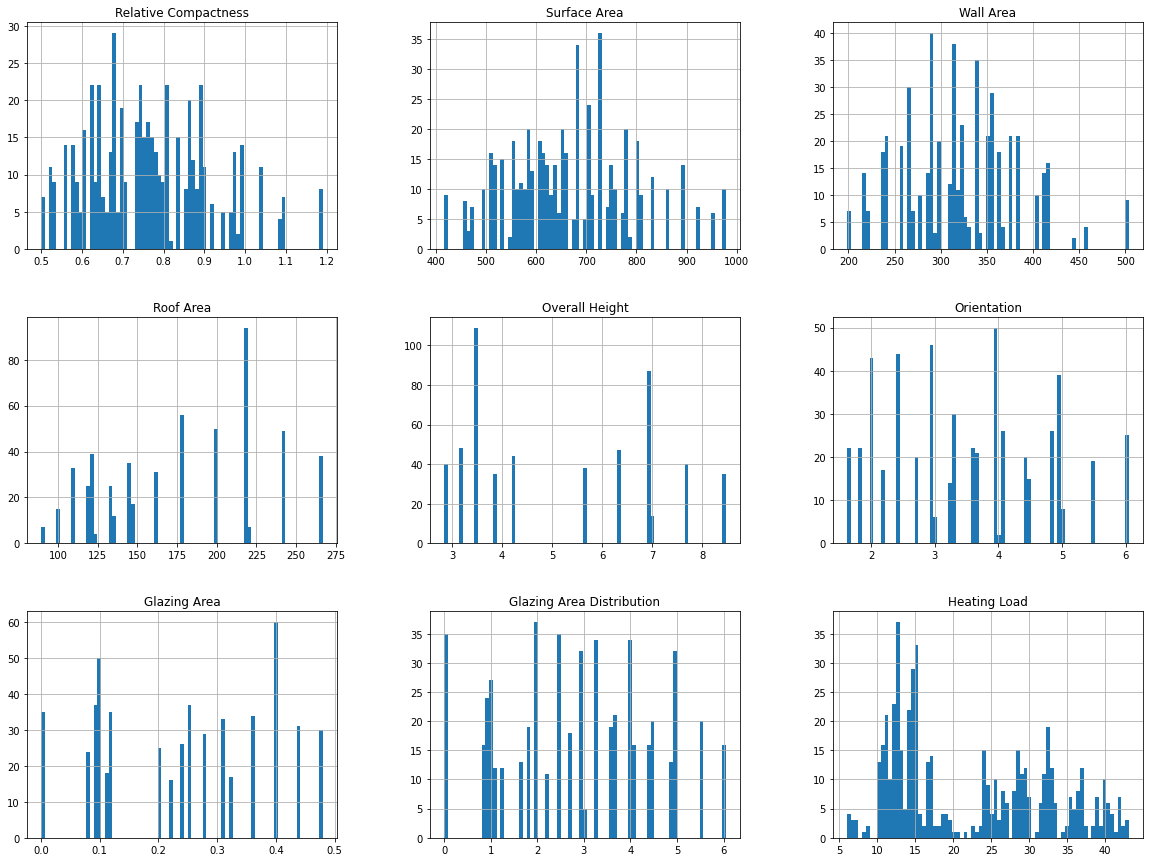

In [328]:
#Here I am creating a histogram to see how the data looks like of the features 
#and quantitity of the variables that are recorded in the data set.
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=75, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Roof Area', ylabel='Overall Height'>

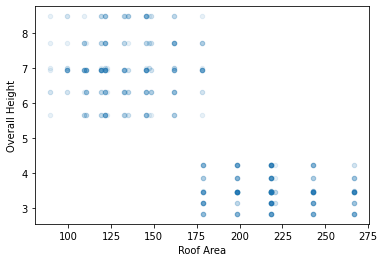

In [329]:
#Looking at a specific scatter plot of one of the features against Y 
#and observing the data 
df.plot(kind="scatter", x="Roof Area", y="Overall Height", alpha=0.1)

<AxesSubplot:xlabel='Roof Area', ylabel='Heating Load'>

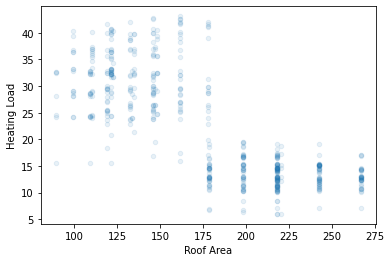

In [330]:
#Looking at a specific scatter plot of one of the features against Y 
#and observing the data 
df.plot(kind="scatter", x="Roof Area", y="Heating Load", alpha=0.1)

In [331]:
#The table here shows the correlation of the features and the output variable against each other. 
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
Relative Compactness,1.000000,-0.523562,-0.166166,-0.550378,0.564794,0.012043,0.039652,0.002218,0.444701
Surface Area,-0.523562,1.000000,0.170010,0.578806,-0.600647,0.058195,0.045011,-0.037462,-0.499603
Wall Area,-0.166166,0.170010,1.000000,-0.222292,0.146158,0.093941,0.027755,-0.063205,0.308799
Roof Area,-0.550378,0.578806,-0.222292,1.000000,-0.812518,-0.034108,-0.013209,-0.025993,-0.774212
Overall Height,0.564794,-0.600647,0.146158,-0.812518,1.000000,0.037864,-0.013994,0.008482,0.809140
Orientation,0.012043,0.058195,0.093941,-0.034108,0.037864,1.000000,0.006864,-0.000023,0.021983
Glazing Area,0.039652,0.045011,0.027755,-0.013209,-0.013994,0.006864,1.000000,0.180052,0.273489
Glazing Area Distribution,0.002218,-0.037462,-0.063205,-0.025993,0.008482,-0.000023,0.180052,1.000000,0.076206
Heating Load,0.444701,-0.499603,0.308799,-0.774212,0.809140,0.021983,0.273489,0.076206,1.000000


###Conclusion of the 9 features and the output variable. 
Y has the highest corrlation with Overall Height. Also, Y has high corrlation with Roof Area despite 
negative corrlation. 
Furthermore, there is a high corrleation of Overall Height and the Roof Area. 
These three corrlations are the highest in the table. 
As a result, I will use them on the three different regression models. 

### 4. Data pre-processing

Here I am going to clear the data and prepare it for the models to learn from it. This is an important part of the Machine Learning because it will influence how the model will be working. Also, I will split the data into training set and the testing set. 

In [332]:
# # Drop the X0 column as it is a categorical variable that is not relevant for modelling
X_train = X_train.drop("Catergory of the building", axis=1)

In [333]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [334]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train)
cat_attribs = ["Catergory of the building"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

X_train_pipline2 = full_pipeline.fit_transform(X_train)

In [335]:
#Looking at the shape of the data after the pipeline has been applied
X_train

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00
...,...,...,...,...,...,...,...,...
71,0.75,654.89,416.50,121.28,8.47,4.05,0.09,0.90
106,1.04,582.12,291.06,161.70,7.70,3.96,0.09,2.42
270,0.86,575.51,326.10,242.55,3.47,4.84,0.12,6.05
435,0.97,509.36,355.74,109.15,6.93,6.05,0.31,3.24


In [336]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train)
cat_attribs = ["Catergory of the building"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

X_test_pipline2 = full_pipeline.fit_transform(X_test)

# Performing the GridSearchCV on the training set

5.2 Cross Validation of the Ridge Regression Models

Here is the GridSearchCV (tuning) of the Ridge Regression model with all the 9 features of the data set.

In [337]:
#Here is the list of all possible parameters that I can have for the Ridge Regression 
#Model and test it and then tune it on the Ridge Regression Model.
param_grid = [
    {"alpha": [0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.5, 3.0, 3.5, 4.0],
     "max_iter": [1,5,10,15,20,25,30,40,50,75,100,125,150,200,300,400, 1000]}
]

In [338]:
#Grid Search Cross Validation the ridge regression model
# Use cross-validation to evaluate the performance of the model and select the best hyperparameters
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_pipline2, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                    0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                                    1.7, 1.8, 1.9, 2.0, 2.5, 3.0, 3.5, 4.0],
                          'max_iter': [1, 5, 10, 15, 20, 25, 30, 40, 50, 75,
                                       100, 125, 150, 200, 300, 400, 1000]}],
             scoring='neg_mean_squared_error')

In [339]:
print("Best hyperparameters: ", grid_search_ridge.best_params_)

Best hyperparameters:  {'alpha': 4.0, 'max_iter': 1}


In [340]:
print("Parameters for the ridge model: ", grid_search_ridge.best_estimator_)

Parameters for the ridge model:  Ridge(alpha=4.0, max_iter=1)


Here is the GridSearchCV (tuning) of the Lasso Regression model with all the 9 features from the data set. 

In [341]:
#Here is the list of all possible parameters that I can have for the Lasso Regression 
#Model and test it and then tune it on the Lasso Regression Model.
param_grid = [
    {"alpha": [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
     "max_iter": [1,5,10,15,20,25,30,40,50,75,100,125,150,200,300,400, 1000]}
]

In [342]:
#Grid Search Cross Validation the ridge regression model
# Use cross-validation to evaluate the performance of the model and select the best hyperparameters
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_pipline2, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.647e+03, tolerance: 4.372e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.041e+03, tolerance: 4.194e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.992e+03, tolerance: 4.319e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05,
                                    0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                    0.5],
                          'max_iter': [1, 5, 10, 15, 20, 25, 30, 40, 50, 75,
                                       100, 125, 150, 200, 300, 400, 1000]}],
             scoring='neg_mean_squared_error')

In [343]:
print("Best hyperparameters: ", grid_search_lasso.best_params_)

Best hyperparameters:  {'alpha': 0.001, 'max_iter': 20}


In [344]:
print("Parameters for the Lasso model: ", grid_search_lasso.best_estimator_)

Parameters for the Lasso model:  Lasso(alpha=0.001, max_iter=20)


### **5. Tunning of different models**

Here is the table where the parameters of each model can be seen:

Linear Regression with all data:
LinearRegression()

Linear Regression with X4 column only:
LinearRegression()

Linear Regression with X5 column only:
LinearRegression()

Ridge Regression with all data:
Ridge(alpha=2.0, max_iter=1, random_state=1)

Ridge Rewgression with X4 column only:
Ridge(alpha=1.7, max_iter=1, random_state=1)

Ridge Regression with X5 column only:
Ridge(alpha=1.2, max_iter=1, random_state=1)

Lasso Regression with all data:
Lasso(alpha=0.005, max_iter=20, random_state=1)

Lasso Regression with X4 column only:
Lasso(alpha=0.01, max_iter=1, random_state=1)

Lasso Regression with X5 column only:
Lasso(alpha=0.005, max_iter=1, random_state=1)

### 4. Models training and performing Cross-Validation

The list of training set that are going to be used for the cross-validation are: Overall Height against Roof Area, all the 9 features, Roof Area alone and the Overall Height alone. They all are going to be used on the three models: Linear Regression, Ridge Regression and Lasso Regression models. 

# 6. The new Models with parameters after performing GridSearchCV()

 Here we are going to create the new linear regression models with parameters from the cross validation operation. 

Here we are making a simple model of the Linear Regression model for all the 9 features. 

In [345]:
#Model developemnt
#Simple Linear Regression with parameters from the cross validation operation and all features all together.
new_lin_reg_cross_validated = LinearRegression(n_jobs=1)
new_lin_reg_cross_validated.fit(X_train_pipline2, Y_train)

LinearRegression(n_jobs=1)

In [346]:
#Evaluating the performance of the Linear regression model using the 
#mean square error between the actual target values 
#and the predicted target values on the training data. 
#Rooted mean square error is done next and this is to evaluate the 
#performance of the regression models.
#Furthermore, it represents the standard deviation of the differences 
#between the predicted values and the actual values.
data_XTrain_predictions1 = new_lin_reg_cross_validated.predict(X_train_pipline2)
data_XTrain_predictions_mse1 = mean_squared_error(Y_train, data_XTrain_predictions1)
print("data_XTrain_predictions_mse: ", data_XTrain_predictions_mse1)
new_lin_reg_cross_validation_rmse1 = np.sqrt(data_XTrain_predictions_mse1)
print("new_lin_reg_cross_validation_rmse1: ", new_lin_reg_cross_validation_rmse1)

data_XTrain_predictions_mse:  20.518265037968803
new_lin_reg_cross_validation_rmse1:  4.52970915600205


In [347]:
# onother useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_lin_reg_mae1 = mean_absolute_error(Y_train, data_XTrain_predictions1)
print("New_lin_reg_mae1: ", new_lin_reg_mae1)

New_lin_reg_mae1:  3.468100585071172


In [348]:
#cross-validation of linear regression model with Overall Height and Roof Area 
cross_val_score_new_lin_reg = cross_val_score(new_lin_reg_cross_validated,X_train_pipline2, Y_train, cv=5)
print("cross_val_score_new_lin_reg: ", cross_val_score_new_lin_reg)

cross_val_score_new_lin_reg:  [0.80784823 0.79805249 0.7886155  0.77234252 0.76748753]


6.1 Here we are going to create the new ridge regression models with parameters from the cross validation operation.

Ridge Regression model of all the features in the data set

In [349]:
#Model development
#Ridge Regression with parameters from the cross validation operation and with all features all together.
new_ridge_reg_cross_validation = Ridge(alpha=4.0, max_iter=1, random_state=1)
new_ridge_reg_cross_validation.fit(X_train_pipline2, Y_train)

Ridge(alpha=4.0, max_iter=1, random_state=1)

In [350]:
#Evaluating the performance of the Ridge regression model using the mean 
#square error between the actual target values 
#and the predicted target values on the training data. 
#Rooted mean square error is done next and this is to evaluate the 
#performance of the regression models.
#Furthermore, it represents the standard deviation of the differences 
#between the predicted values and the actual values.
data_XTrain_predictions2 = new_ridge_reg_cross_validation.predict(X_train_pipline2)
data_XTrain_predictions_mse2 = mean_squared_error(Y_train, data_XTrain_predictions1)
print("data_XTrain_predictions_mse2: ", data_XTrain_predictions_mse2)
new_ridge_reg_cross_validationX_rmse2 = np.sqrt(data_XTrain_predictions_mse2)
print("new_ridge_reg_cross_validationX_rmse2: ", new_ridge_reg_cross_validationX_rmse2)

data_XTrain_predictions_mse2:  20.518265037968803
new_ridge_reg_cross_validationX_rmse2:  4.52970915600205


In [351]:
# Other useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_ridge_reg_cross_validationX_mae2 = mean_absolute_error(Y_train, data_XTrain_predictions1)
print("new_ridge_reg_cross_validationX_mae2: ", new_ridge_reg_cross_validationX_mae2)

new_ridge_reg_cross_validationX_mae2:  3.468100585071172


In [352]:
#Cross-validation of linear regression model with Overall Height and Roof Area 
cross_val_score_new_ridge_reg_cross_validation = cross_val_score(new_ridge_reg_cross_validation,X_train_pipline2, Y_train, cv=5)
print("cross_val_score_new_ridge_reg_cross_validation: ", cross_val_score_new_ridge_reg_cross_validation)

cross_val_score_new_ridge_reg_cross_validation:  [0.80808434 0.79669872 0.78882527 0.77374875 0.76757126]


6.2 Here we are going to create the new lasso regression models with parameters from the cross validation operation.

Lasso regression model of all 9 features in the data set

In [353]:
#Perform feature selection score using Lasso regression
new_lasso_reg_cross_validation = Lasso(alpha=0.005, max_iter=30, random_state=1)
new_lasso_reg_cross_validation.fit(X_train_pipline2, Y_train)

Lasso(alpha=0.005, max_iter=30, random_state=1)

In [354]:
#Evaluating the performance of the Lasso regression model using the 
#mean square error between the actual target values and the predicted 
#target values on the training data. Rooted mean square error is done 
#next and this is to evaluate the performance of the regression models.
#Furthermore, it represents the standard deviation of the differences 
#between the predicted values and the actual values.
data_XTrain_predictions3 = new_lasso_reg_cross_validation.predict(X_train_pipline2)
data_XTrain_predictions_mse3 = mean_squared_error(Y_train, data_XTrain_predictions3)
print("data_XTrain_predictions_mse3: ", data_XTrain_predictions_mse3)
new_lasso_reg_cross_validationX_rmse3 = np.sqrt(data_XTrain_predictions_mse3)
print("new_lasso_reg_cross_validationX_rmse3: ", new_lasso_reg_cross_validationX_rmse3)

data_XTrain_predictions_mse3:  20.518495993294135
new_lasso_reg_cross_validationX_rmse3:  4.529734649324851


In [355]:
# Other useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_lasso_reg_cross_validationX_mae3 = mean_absolute_error(Y_train, data_XTrain_predictions3)
print("New_lasso_reg_cross_validationX_mae3: ", new_lasso_reg_cross_validationX_mae3)

New_lasso_reg_cross_validationX_mae3:  3.4671009134648716


In [356]:
#Cross-validation of linear regression model with Overall Height and Roof Area 
cross_val_score_new_lasso_reg_cross_validation = cross_val_score(new_lasso_reg_cross_validation,X_train_pipline2, Y_train, cv=5)
print("cross_val_score_new_lasso_reg_cross_validation: ", cross_val_score_new_lasso_reg_cross_validation)

cross_val_score_new_lasso_reg_cross_validation:  [0.80804313 0.79786969 0.78852975 0.77258497 0.76724803]


### 6.4 Chosing the best models for Evaluation

The cross validated of the linear regression model with all 9 features. 

In [357]:
#The linear regression model with all 9 features from the data set.
new_lin_reg_cross_validated = LinearRegression(n_jobs=1)
new_lin_reg_cross_validated.fit(X_test_pipline2, Y_test)

LinearRegression(n_jobs=1)

In [358]:
#Evaluating the performance of the Linear regression model using the mean 
#square error between the actual target values and the predicted target 
#values on the training data. Rooted mean square error is done next and 
#this is to evaluate the performance of the regression models. Furthermore, it 
#represents the standard deviation of the differences between the predicted values 
#and the actual values.
data_XTrain_predictions1 = new_lin_reg_cross_validated.predict(X_test_pipline2)
data_XTrain_predictions_mse1 = mean_squared_error(Y_test, data_XTrain_predictions1)
print("data_XTrain_predictions_mse: ", data_XTrain_predictions_mse1)
new_lin_reg_cross_validation_rmse1 = np.sqrt(data_XTrain_predictions_mse1)
print("new_lin_reg_cross_validation_rmse1: ", new_lin_reg_cross_validation_rmse1)

data_XTrain_predictions_mse:  18.253413123792424
new_lin_reg_cross_validation_rmse1:  4.272401329907154


In [359]:
# Other useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_lin_reg_mae1 = mean_absolute_error(Y_test, data_XTrain_predictions1)
print("New_lin_reg_mae1: ", new_lin_reg_mae1)

New_lin_reg_mae1:  3.1759917572801353


In [360]:
#Cross-validation of linear regression model with Overall Height and Roof Area 
cross_val_score_new_lin_reg = cross_val_score(new_lin_reg_cross_validated,X_test_pipline2, Y_test, cv=5)
print("cross_val_score_new_lin_reg: ", cross_val_score_new_lin_reg)

cross_val_score_new_lin_reg:  [0.82038732 0.70614254 0.86145572 0.83998294 0.79926366]


Cross Validated Ridge Regression with all 9 features 

In [361]:
#The Ridge regression model with all 9 features from the data set.
new_ridge_reg_cross_validation = Ridge(alpha=2.0, max_iter=1, random_state=1)
new_ridge_reg_cross_validation.fit(X_test_pipline2, Y_test)

Ridge(alpha=2.0, max_iter=1, random_state=1)

In [362]:
#Evaluating the performance of the Ridge regression model using the mean 
#square error between the actual target values and the predicted target 
#values on the training data. Rooted mean square error is done next and this 
#is to evaluate the performance of the regression models. Furthermore, it 
#represents the standard deviation of the differences between the predicted 
#values and the actual values.
data_XTrain_predictions2 = new_ridge_reg_cross_validation.predict(X_test_pipline2)
data_XTrain_predictions_mse2 = mean_squared_error(Y_test, data_XTrain_predictions1)
print("data_XTrain_predictions_mse2: ", data_XTrain_predictions_mse2)
new_ridge_reg_cross_validationX_rmse2 = np.sqrt(data_XTrain_predictions_mse2)
print("new_ridge_reg_cross_validationX_rmse2: ", new_ridge_reg_cross_validationX_rmse2)

data_XTrain_predictions_mse2:  18.253413123792424
new_ridge_reg_cross_validationX_rmse2:  4.272401329907154


In [363]:
# Other useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_ridge_reg_cross_validationX_mae2 = mean_absolute_error(Y_test, data_XTrain_predictions1)
print("new_ridge_reg_cross_validationX_mae2: ", new_ridge_reg_cross_validationX_mae2)

new_ridge_reg_cross_validationX_mae2:  3.1759917572801353


In [364]:
#Cross-validation of linear regression model with Overall Height and Roof Area 
cross_val_score_new_ridge_reg_cross_validation = cross_val_score(new_ridge_reg_cross_validation,X_test_pipline2, Y_test, cv=5)
print("cross_val_score_new_ridge_reg_cross_validation: ", cross_val_score_new_ridge_reg_cross_validation)

cross_val_score_new_ridge_reg_cross_validation:  [0.82114921 0.70824867 0.86074744 0.83880939 0.7988176 ]


Cross Validated Lasso Regression model of all 9 features.

In [365]:
#The Lasso regression model with all 9 features from the data set.
new_lasso_reg_cross_validation = Lasso(alpha=0.005, max_iter=30, random_state=1)
new_lasso_reg_cross_validation.fit(X_test_pipline2, Y_test)

Lasso(alpha=0.005, max_iter=30, random_state=1)

In [366]:
#Evaluating the performance of the Lasso regression model using the mean square error 
#between the actual target values and the predicted target values on the training data. 
#Rooted mean square error is done next and this is to evaluate 
#the performance of the regression models. Furthermore, it represents the standard 
#deviation of the differences between the predicted values and the actual values.
data_XTrain_predictions3 = new_lasso_reg_cross_validation.predict(X_test_pipline2)
data_XTrain_predictions_mse3 = mean_squared_error(Y_test, data_XTrain_predictions3)
print("data_XTrain_predictions_mse3: ", data_XTrain_predictions_mse3)
new_lasso_reg_cross_validationX_rmse3 = np.sqrt(data_XTrain_predictions_mse3)
print("new_lasso_reg_cross_validationX_rmse3: ", new_lasso_reg_cross_validationX_rmse3)

data_XTrain_predictions_mse3:  18.25367085298975
new_lasso_reg_cross_validationX_rmse3:  4.2724314919012745


In [367]:
# Other useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error
new_lasso_reg_cross_validationX_mae3 = mean_absolute_error(Y_test, data_XTrain_predictions3)
print("New_lasso_reg_cross_validationX_mae3: ", new_lasso_reg_cross_validationX_mae3)

New_lasso_reg_cross_validationX_mae3:  3.176393073340774


In [368]:
#Cross-validation of linear regression model with all 9 features from the data set and output variable. 
cross_val_score_new_lasso_reg_cross_validation = cross_val_score(new_lasso_reg_cross_validation,X_test_pipline2, Y_test, cv=5)
print("cross_val_score_new_lasso_reg_cross_validation: ", cross_val_score_new_lasso_reg_cross_validation)

cross_val_score_new_lasso_reg_cross_validation:  [0.82043779 0.70641182 0.86123704 0.83993764 0.79956035]


As we can see, the best models to chose are:


1.   Linear Regression model with all 9 features. 
2.   Ridge Regression model with all 9 features.